In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
# !pip install transformers
from transformers import pipeline
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv("C:/Users/lasko/Documents/Bocconi/2nd Semester/Natural Language Processing/Final Project/company_aspect_matrix_with_counts.csv")

Company aspect

In [5]:
df.head()

,firm,aspect,avg_star_rating,n_mentions
0,AFH Wealth Management,benefits,3.00,2
1,AFH Wealth Management,culture,5.00,1
2,AFH Wealth Management,flexibility,1.00,1
3,AFH Wealth Management,management,2.75,4
4,AFH Wealth Management,pay,3.00,2


##### Short EDA for company aspects

In [6]:
df['n_mentions'].min(), df['n_mentions'].max()

(1, 101)

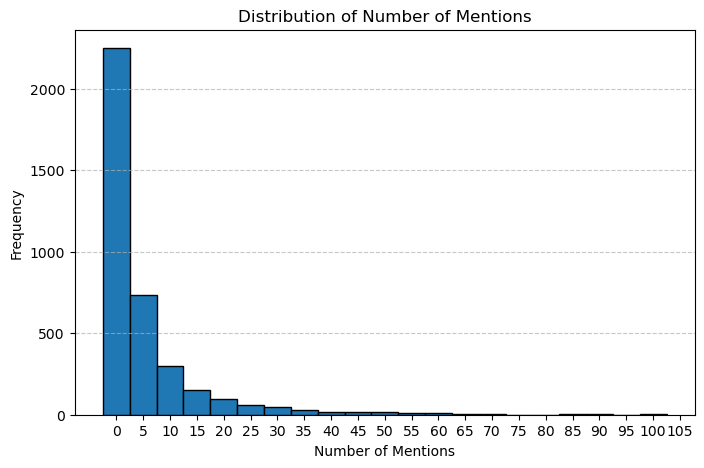

In [7]:
bins = list(range(0, 110, 5))

plt.figure(figsize=(8,5))
plt.hist(df['n_mentions'], bins=bins, edgecolor='black', align='left')
plt.title('Distribution of Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
# Count number of aspects per firm
aspect_count = df.groupby('firm')['aspect'].count().reset_index(name='n_aspects')
aspect_count.sort_values('n_aspects', ascending=False)

,firm,n_aspects
156,J P Morgan,18
205,Network Rail,18
34,BT,18
32,BP,18
51,Booking com,18
...,...,...
202,National Offender Management Service,2
152,Intelligent Office UK,2
171,LGT Group,2
256,Sport England,1


In [9]:
print(aspect_count[aspect_count['n_aspects'] < 5])
len(aspect_count[aspect_count['n_aspects'] < 5])

                                     firm  n_aspects
15                         Anglo American          4
16         Animal and Plant Health Agency          2
96                Department of Health UK          3
107                          Egon Zehnder          4
133       HM Courts and Tribunals Service          3
152                 Intelligent Office UK          2
163                                   KKR          3
171                             LGT Group          2
202  National Offender Management Service          2
203                         National Star          3
206     Newcastle Upon Tyne Hospitals NHS          1
216                           Orbit Group          3
218                       Penderels Trust          2
256                         Sport England          1
297                     Wakefield Council          4
307                    XPS Pensions Group          2
309                                  ibis          4


17

In [10]:
# Drop rows where n_mentions < 3
filtered_df = df[df['n_mentions'] >= 3]

# Count number of aspects per firm after filtering
aspect_count_filtered = filtered_df.groupby('firm')['aspect'].count().reset_index(name='n_aspects_filtered')
sorted_aspect_count_filtered = aspect_count_filtered.sort_values('n_aspects_filtered', ascending=False)
sorted_aspect_count_filtered[sorted_aspect_count_filtered['n_aspects_filtered'] < 3]


,firm,n_aspects_filtered
0,AFH Wealth Management,2
229,The Department for Education UK,2
119,HM Treasury,2
74,Curtis Banks,2
89,Durham County Council,2
54,Cambridge Assessment,2
164,Met Office,2
245,Vets Now,2
39,Barratt Developments,2
225,Tate Recruitment,2


In [11]:
comparison = aspect_count.merge(aspect_count_filtered, on='firm', how='left')

comparison['n_dropped'] = comparison['n_aspects'] - comparison['n_aspects_filtered']

comparison['n_dropped'].min(), comparison['n_dropped'].max()


(0.0, 11.0)

**INSIGHTS**:
- In order not to lose too many aspects due to their low number of mentions, we're **discarding the filtering based on n_mentions**
- To maximize the best fit based on aspects, we're **filtering out companies that have less than 5 aspects** mentioned in the reviews.

Company aspect - pivoted

In [12]:
df_pivot = df.pivot(
    index='firm',
    columns='aspect',
    values='avg_star_rating'
)

In [13]:
df_pivot.head()

aspect,benefits,culture,diversity & inclusion,flexibility,growth,job role clarity,job security,management,pay,people,performance feedback,remote work,stress & pressure,teamwork & collaboration,tools & resources,training & onboarding,travel,work-life balance
firm,,,,,,,,,,,,,,,,,,
AFH Wealth Management,3.000000,5.000000,NaN,1.000000,NaN,NaN,NaN,2.750000,3.000000,3.333333,2.50,NaN,NaN,2.500000,1.000000,3.0,NaN,2.500000
AJ Bell,2.333333,3.750000,1.0,4.000000,4.666667,NaN,NaN,3.142857,2.500000,3.666667,NaN,NaN,NaN,3.500000,4.333333,5.0,NaN,4.000000
ASOS,3.760000,3.692308,4.0,2.571429,2.833333,2.833333,NaN,2.111111,2.615385,3.227273,2.75,NaN,1.4,3.785714,3.428571,5.0,3.0,3.538462
AXA UK,3.875000,3.428571,4.0,4.250000,3.100000,2.000000,NaN,2.600000,2.833333,4.090909,1.50,NaN,2.0,5.000000,2.666667,3.0,NaN,4.500000
Abcam,3.500000,4.250000,NaN,5.000000,3.833333,3.000000,NaN,NaN,3.000000,5.000000,NaN,NaN,NaN,2.000000,NaN,3.0,3.0,NaN


## Summarization - pros & cons

In [14]:
df_reviews = pd.read_csv("C:/Users/lasko/Documents/Bocconi/2nd Semester/Natural Language Processing/Final Project/comparison_cleans.csv")
df_reviews.head()

,Unnamed: 0,firm,pros,cons,pros_clean_min,pros_clean_lemma_only,pros_clean_with_stopwords,pros_clean_with_symspell,cons_clean_min,cons_clean_lemma_only,cons_clean_with_stopwords,cons_clean_with_symspell,min_pro_aspect_sentiments,lemma_pro_aspect_sentiments,Stopword_pro_aspect_sentiments,Symspell_pro_aspect_sentiments,min_con_aspect_sentiments,lemma_con_aspect_sentiments,Stopword_con_aspect_sentiments,Symspell_con_aspect_sentiments
0,77921,Taylor Wimpey,"Through all the uncertainty recently, the business has given us regular updates and so much help to our subcontractors as well.",Nothing to report on cons,"Through all the uncertainty recently, the business has given us regular updates and so much help to our subcontractors as well.",through all the uncertainty recently the business have give we regular update and so much help to our subcontractor as well,uncertainty recently business give regular update help subcontractor,uncertainty recently business give regular update help subcontractor,Nothing to report on cons,nothing to report on con,report con,report con,"{'hr & recruitment': {1: 0.0065248124, 2: 0.009976743, 3: 0.07192801, 4: 0.41728714, 5: 0.4942833, 'label': 5}, 'pay': {1: 0.008823503, 2: 0.01256192, 3: 0.07439643, 4: 0.3970602, 5: 0.507158, 'label': 5}}","{'hr & recruitment': {1: 0.011723144, 2: 0.016802024, 3: 0.09579884, 4: 0.44455576, 5: 0.43112022, 'label': 4}, 'pay': {1: 0.015728751, 2: 0.019961175, 3: 0.09760706, 4: 0.42497307, 5: 0.44173, 'label': 5}}","{'pay': {1: 0.21561441, 2: 0.17501962, 3: 0.2791949, 4: 0.2328562, 5: 0.09731485, 'label': 3}}","{'pay': {1: 0.21561441, 2: 0.17501962, 3: 0.2791949, 4: 0.2328562, 5: 0.09731485, 'label': 3}}",{},{},{},{}
1,69618,RSM,10 years enough of working,Didn't learn anything and some staff got the privilege and got more right than ten years of pratical working experience,10 years enough of working,10 year enough of work,10 year work,year work,Didn't learn anything and some staff got the privilege and got more right than ten years of pratical working experience,do not learn anything and some staff get the privilege and get more right than ten year of pratical working experience,learn staff get privilege get right year pratical working experience,learn staff get privilege get right year pratical work experience,{},{},{},{},"{'growth & learning': {1: 0.393355, 2: 0.39159673, 3: 0.16222776, 4: 0.038433637, 5: 0.014386767, 'label': 1}, 'hr & recruitment': {1: 0.40221596, 2: 0.37933618, 3: 0.16232815, 4: 0.040704962, 5: 0.015414778, 'label': 1}}","{'growth & learning': {1: 0.48763096, 2: 0.36970064, 3: 0.11748613, 4: 0.01869333, 5: 0.0064889165, 'label': 1}, 'hr & recruitment': {1: 0.5000417, 2: 0.3613481, 3: 0.11387235, 4: 0.018402217, 5: 0.0063355914, 'label': 1}}","{'growth & learning': {1: 0.27291757, 2: 0.23455243, 3: 0.24153613, 4: 0.15952054, 5: 0.091473356, 'label': 1}, 'hr & recruitment': {1: 0.32152423, 2: 0.25004247, 3: 0.21919145, 4: 0.1339184, 5: 0.0753234, 'label': 1}}","{'growth & learning': {1: 0.2770429, 2: 0.23297314, 3: 0.2403897, 4: 0.15829127, 5: 0.091302976, 'label': 1}, 'hr & recruitment': {1: 0.32443452, 2: 0.24634525, 3: 0.21806312, 4: 0.13441652, 5: 0.07674062, 'label': 1}}"
2,60239,NHS,None terrible place\r\nDon't go there,Terrible place to work\r\nDon't go there,None terrible place Don't go there,none terrible place do not go there,terrible place,terrible place,Terrible place to work Don't go there,terrible place to work do not go there,terrible place work,terrible place work,{},{},{},{},{},{},{},{}
3,74473,Savills,Great people.\nThe open plan culture means that everyone is accessible.\nGorgeous office in a great location.\nWork/life balance.\nFlexible/home working possible as their IT systems are so good.\nInternal movement is encouraged.,"As it is such a big company, process can slow down getting things done.\nLower salaries at some levels due to bonus potential.",Great people. The open plan culture means that everyone is accessible. Gorgeous off

In [15]:
pros = df_reviews['pros_clean_min']
cons = df_reviews['cons_clean_min']

Grouping by company:

In [16]:
company_pros = df_reviews.groupby('firm')['pros_clean_min'].apply(lambda texts: ' '.join(texts)).reset_index()
company_cons = df_reviews.groupby('firm')['cons_clean_min'].apply(lambda texts: ' '.join(texts)).reset_index()

company_pros.head()

,firm,pros_clean_min
0,ASOS,"Informal environment and a lot of holiday Perks and good environment great benefits, diverse and international team You get to go home. Eventually."
1,AXA UK,"Forward thinking, people centred organisation Family environment, friendly company, interesting work Room to progress Lots of initiatives"
2,Accenture,"It's very people-centric and there are plenty of career advancement and personal development opportunities Good medical insurance benefits, good variety of clients and service offerings Fantastic people challenging environment Sets you up with the basics for the rest of your career People are incredibly collaborative and willing to help you, whatever the problem. Always very intelligent people so its easy to delegate work and expect a good job to be done. Great benefits and I have been able to take flexible working options now I have kids, without compromising my career in Consulting. - It's useful if you don't know what else you want to do as you'll get a good idea of different roles and industries. - If you are willing to play the game, you can have a career here. You get to work with driven and talented people The caliber of people is very high. Good for socials and an inclusive work environment with lots of arranges activities and drinks. Variety of sectors / areas you can get involved in dependent upon interest / skills Easy to get in as a graduate, big clients Opportunities, progression, finance, promotion, big customers Its culture and values are great Its policies make you feel that they really care for you Great company with lots of opportunities and variety Very flexible to manage your time and effort Good name in the market - Incredibly bright and enthusiastic people to work with - Industry-leading graduate programme - Sense of belonging and overall community feel (predominantly from Consultant level and above) - Multinational FTSE 500 clients on their biggest business and technology challenges - Continuous improvement on existing methodologies (focus on Design Thinking and empathy-based decision making) and overall focus on innovation - Thorough internal training portal and budget for external training - Restructured performance system, aimed at fairer representation good pay compared to other tech services companies"
3,Accor,"Friendly, Fast pace, Efficient, Challenging, Interesting there where no positives in working there There was literally nothing good. Work like a dog but dont expect a payrise or a promotion even if you have been working there for a few years now."
4,Adecco,"Clear progression routes, great collaboration, brilliant corporate framework and support"


In [17]:
len(company_pros)

211

##### LLM for summarization

In [18]:
# from transformers import pipeline

# summarizer = pipeline(
#     "summarization",
#     model="google/pegasus-cnn_dailymail",
#     device=-1
# )

Example to summarize - Accenture:

In [19]:
# company_pros['pros_summary'] = None

# company_pros.at[2, 'pros_summary'] = summarizer(
#     company_pros.at[2, 'pros_clean_min'],
#     max_length=60, 
#     min_length=20, 
#     do_sample=False
# )[0]['summary_text']


In [20]:
# company_pros.head()

In [21]:
len(company_pros)

211

##### Google - **google/flan-t5-large**

In [22]:
# from transformers import pipeline
# summarizer = pipeline("text2text-generation", model="google/flan-t5-large")

In [23]:
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-large")
# model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-large")

Example to summarize - Accenture:

In [24]:
# company_pros['pros_summary'] = None

# # PROMPT!
# input_text = f"""
# You are an expert in analyzing positive aspects of companies.
# Summarize the following text for a person considering joining the company.

# Text to summarize:
# {company_pros.at[0, 'pros_clean_min']}
# """

# company_pros.at[0, 'pros_summary'] = summarizer(
#     input_text,
#     max_length=200,  
#     do_sample=False
# )[0]['generated_text']

In [25]:
# company_pros.head()

##### Meta -  **Llama3.1-8B** from Hugging Face

In [ ]:
summarization_pipeline = pipeline("text-generation", model="meta-llama/Llama-3.1-8B")

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.1-8B")

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [1]:
def generate_summary(text):
    # PROMPT!
    prompt = f"""
    You are an expert in analyzing positive aspects of companies.
    Summarize the following text in  short sentences for a person considering joining the company.
    Be concise, clear and professional.

    Text to summarize:
    {text}
    """
    output = summarization_pipeline(prompt)[0]['generated_text']
    return output.strip()

Example to summarize - Accenture:

In [2]:
company_pros['pros_summary'] = None
company_pros.at[2, 'pros_summary'] = generate_summary(company_pros.at[2, 'pros_clean_min'])

NameError: name 'company_pros' is not defined

In [27]:
company_pros.head()

,firm,pros_clean_min,pros_summary
0,ASOS,"Informal environment and a lot of holiday Perks and good environment great benefits, diverse and international team You get to go home. Eventually.",None
1,AXA UK,"Forward thinking, people centred organisation Family environment, friendly company, interesting work Room to progress Lots of initiatives",None
2,Accenture,"It's very people-centric and there are plenty of career advancement and personal development opportunities Good medical insurance benefits, good variety of clients and service offerings Fantastic people challenging environment Sets you up with the basics for the rest of your career People are incredibly collaborative and willing to help you, whatever the problem. Always very intelligent people so its easy to delegate work and expect a good job to be done. Great benefits and I have been able to take flexible working options now I have kids, without compromising my career in Consulting. - It's useful if you don't know what else you want to do as you'll get a good idea of different roles and industries. - If you are willing to play the game, you can have a career here. You get to work with driven and talented people The caliber of people is very high. Good for socials and an inclusive work environment with lots of arranges activities and drinks. Variety of sectors / areas you can get involved in dependent upon interest / skills Easy to get in as a graduate, big clients Opportunities, progression, finance, promotion, big customers Its culture and values are great Its policies make you feel that they really care for you Great company with lots of opportunities and variety Very flexible to manage your time and effort Good name in the market - Incredibly bright and enthusiastic people to work with - Industry-leading graduate programme - Sense of belonging and overall community feel (predominantly from Consultant level and above) - Multinational FTSE 500 clients on their biggest business and technology challenges - Continuous improvement on existing methodologies (focus on Design Thinking and empathy-based decision making) and overall focus on innovation - Thorough internal training portal and budget for external training - Restructured performance system, aimed at fairer representation good pay compared to other tech services companies","You are an expert in analyzing positive aspects of companies.\n Summarize the following text in short sentences for a person considering joining the company.\n Be concise, clear and professional.\n\n Text to summarize:\n It's very people-centric and there are plenty of career advancement and personal development opportunities Good medical insurance benefits, good variety of clients and service offerings Fantastic people challenging environment Sets you up with the basics for the rest of your career People are incredibly collaborative and willing to help you, whatever the problem. Always very intelligent people so its easy to delegate work and expect a good job to be done. Great benefits and I have been able to take flexible working options now I have kids, without compromising my career in Consulting. - It's useful if you don't know what else you want to do as you'll get a good idea of different roles and industries. - If you are willing to play the game, you can have a career here. You get to work with driven and talented people The caliber of people is very high. Good for socials and an inclusive work environment with lots of arranges activities and drinks. Variety of sectors / areas you can get involved in dependent upon interest / skills Easy to get in as a graduate, big clients Opportunities, progression, finance, promotion, big customers Its culture and values are great Its policies make you feel that they really care for you Great company with lots of opportunities and variety Very flexible to manage your time and effort Good name in the market - Incredibly bright and enthusiastic people to work with - Industry-leading graduate programme

##### Summarization of **pros** per company

In [ ]:
company_pros['pros_summary'] = company_pros['pros_clean_min'].apply(
    lambda text: summarizer(text, max_length=60, min_length=20, do_sample=False)[0]['summary_text']
)

##### Summarization of **cons** per company

In [ ]:
company_cons['cons_summary'] = company_cons['cons_clean_min'].apply(
    lambda text: summarizer(text, max_length=60, min_length=20, do_sample=False)[0]['summary_text']
)

## Ratings - preparation

## Output formatting